# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')
sns.set()

#### 1. Is the distribution of body temperatures normal?

##### a. Checking for Normality Using a Probability Mass Function (PMF)

A PMF is a histogram that shows the probability of an event happening within intervals defined by histogram bins. To find if the body temperature with the given sample is normal, a good first step would be to plot the body temperature as a PMF and compare it to a theoretical PMF where the samples are centered around the mean and normally randomly distributed with the data set's standard deviation. Using ```matplotlib.pyplot```, we graph the observed body temperature data in blue against the normally distributed body temperature data in red.

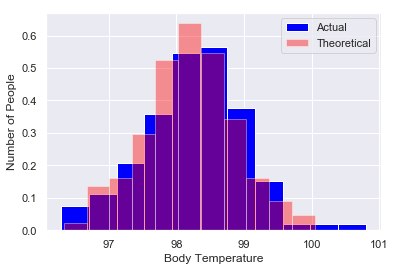

In [2]:
np.random.seed(42)

# Generate normally distributed average body temperatures from the collected data
samples = np.random.normal(np.mean(df['temperature']), np.std(df['temperature']), len(df['temperature']))

# Use the commonly accepted guideline of sqrt(n) number of bins for the PMF
bins = int(np.sqrt(len(df['temperature'])))

# Plot the observed PMF and normally distributed PMF
_ = plt.hist(df['temperature'], bins=bins, color='blue', density=True)
_ = plt.hist(samples, bins=bins, color='red', alpha=0.4, density=True)
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('Number of People')
_ = plt.legend(('Actual', 'Theoretical'), loc='upper right')
plt.show()

We can see from this plot that the distribution of the actual data is around the same as the distribution from the generated normal data. You can argue that the actual data is slightly skewed right from the PMF, so to double check for normality, we will also use an Empirical Cumulative Distribution Function (ECDF).

##### b. Checking for Normality Using an Empirical Cumulative Distribution Function (ECDF)

An ECDF is a graph that shows the proportion of events equal to or less than the provided value along the x-axis. For this example, the plotted points are for body temperature. The points in blue correspond to the observed body temperature values and the points in red correspond to the same normally distributed body temperature data we made from the last step.

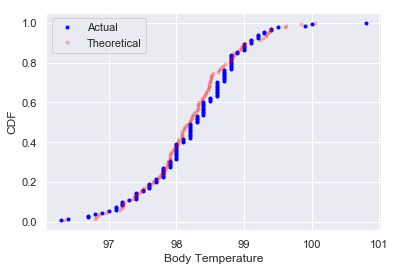

In [3]:
np.random.seed(42)

# Prepare the body temperature data from the DataFrame as an Empirical Cumulative Distribution Function (ECDF)
temp_sort = np.sort(df['temperature'])
p_norm = np.arange(1, len(temp_sort) + 1) / len(temp_sort)

# Prepare normally distributed body temperature data from the DataFrame as an ECDF
samples_sort = np.sort(samples)

# Plot the actual body temperature data ECDF and the normally distributed body temperature data ECDF
_ = plt.plot(temp_sort, p_norm, marker='.', linestyle='none', color = 'blue')
_ = plt.plot(samples_sort, p_norm, marker='.', linestyle='none', color='red', alpha=0.2)
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('CDF')
_ = plt.legend(('Actual', 'Theoretical'))
plt.show()

From the ECDF, we can see that the actual values roughly follow the normal generated values. We are going to assume that the data from the observations are normally distributed for the rest of the exercises.

#### 2. Is the sample size large? Are the observations independent?

To make statistical inferences about the data, we first have to check if we have enough sampled data. Since we are trying to infer true population mean from a sample, a commonly accepted baseline sample size for this metric is 30.

In [4]:
# Find how many human body temperature observations we have in the DataFrame
n = len(df['temperature'])
n

130

From this experiment, we measured the body temperature of 130 individuals which is large enough to make inferences about sample mean.

To claim that these observations are independent, it's accepted practice that the samples are independent if the sample size is less than or equal to 10% of the population. Since more that 1300 people exist on planet Earth at any point in time, it is safe to say that these observations are independent.

Also, we are going to assume that the sample of people was randomly selected and representative of the population on Earth.

#### 3. Is the true population mean really 98.6 degrees F?

##### a. Stating our Null Hypothesis

In order to find if Carl Wunderlich's assertion that the average human body temperature is 98.6&deg;F is true, we are going to set up a Null Hypothesis Test. The Null Hypothesis is that the true population mean is equal to 98.6&deg;F and the Alternative Hypothesis is that the true population mean is not equal to 98.6&deg;F. 

H<sub>0</sub>: $\mu$ = 98.6&deg;F

H<sub>a</sub>: $\mu \neq$ 98.6&deg;F

For this Null Hypothesis Test, we will set the $\alpha$ = 0.05 for a 95% confidence interval. If our observed mean value is within the 95% confidence interval, we will fail to reject the Null Hypothesis in favor of Wunderlich's statement that the mean human body temperature is equal to 98.6&deg;F. If our observed mean is outside the confidence interval, then we will reject the Null Hypothesis in favor for our Alternative Hypothesis that the average human body temperature is not 98.6&deg;F.

##### b. The Bayesian Approach to the Null Hypothesis Test

To perform the Null Hypothesis Test using the Bayesian approach, we must first find the mean and standard deviation of the sample.

In [5]:
obs_mu = np.mean(df['temperature'])
obs_std = np.std(df['temperature'])
print(f'The Observed Average Body Temperature: {obs_mu:.2f} Degrees F')
print(f'The Observed Standard Deviation: {obs_std:.2f} Degrees F')

The Observed Average Body Temperature: 98.25 Degrees F
The Observed Standard Deviation: 0.73 Degrees F


From the observed data, we find that the average body temperature is 98.25&deg;F with a standard deviation of 0.73&deg;F. To find the upper and lower boundaries for our confidence interval, we would normally use a t-table that provides the area under the normal curve given the standard deviation of the sample and its sample size. But since we have 130 samples, the sample size is sufficiently large to assume that the critical t-value $t*$ would be approximately equal to the critical z-value $z*$ from a z-table which provides values of probability under a perfect normal curve. So with 5% of area under the curve for a 95% confidence interval, the critical z-value $z*$ for this test is 1.96. Since the sample spread from the mean is heavily dependent on the sample size, we find the standard error by dividing the standard deviation by $\sqrt{n}$. Multiplying $z*$ by the standard error provides the acceptable margin of error. The confidence interval is the hypothesized population mean of 98.6&deg;F $\pm$ the acceptable margin of error. 

In [6]:
# Center the test around the hypothesized mean
mu_not = 98.6

# Calculate standard and margins of error
std_err = obs_std / np.sqrt(n)
margin_error = 1.96 * std_err

# Calculate boundaries for the interval test
low_interval = mu_not - margin_error
high_interval = mu_not + margin_error

# Display the boundaries for the interval test
print(f'95% Confidence Interval: {low_interval:.2f} to {high_interval:.2f} Degrees F')

95% Confidence Interval: 98.47 to 98.73 Degrees F


From our sample, we establish that our confidence interval is between 98.47&deg;F and 98.73&deg;F. We can see that our observed sample mean of 98.25&deg;F is outside this interval. To find how far away the observed average body temperature is away from Wunderlich's value, we need to find the z-score for our sample mean. The z-score will provide us with how many standard errors our observed 98.25&deg;F average is from the hypothesis average human body temperature given that our Null Hypothesis was true.

In [7]:
# Calculate the z-value for our observed mean given Wunderlich's proposal was true
z_value = (obs_mu - mu_not) / std_err
print(f'Observed Z-Score is {z_value:.2f}')

Observed Z-Score is -5.48


The z-score for our observed mean is -5.48. This means that our observed mean is 5.48 standard deviations to the left of the assumed  average human body temperature of 98.6&deg;F. Since we started this hypothesis test with an $\alpha$ = 0.05 assumption whose critical z-score $z* = \pm1.96$ standard errors away from the mean and our observed z-score is further away than that, we will reject Wunderlich's original observation in favor for the Alternative Hypothesis that the true human body temperature average does not equal 98.6&deg;F. 

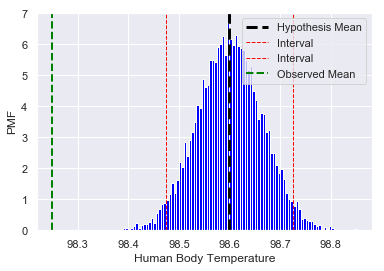

In [8]:
np.random.seed(42)

# Create 10,000 normally distributed  samples centered around the proposed mean and spread given our standard error
bins = 100
samples = np.random.normal(mu_not, std_err, 10000)

# Plot the generated points as a histogram with markers indicating confidence interval, mean, and observation
_ = plt.hist(samples, bins=bins, density=True, color='blue')
_ = plt.axvline(mu_not, color='black', linestyle='dashed', linewidth=3)
_ = plt.axvline(low_interval, color='red', linestyle='dashed', linewidth=1)
_ = plt.axvline(high_interval, color='red', linestyle='dashed', linewidth=1)
_ = plt.axvline(obs_mu, color='green', linestyle='dashed', linewidth=2)
_ = plt.xlabel('Human Body Temperature')
_ = plt.ylabel('PMF')
_ = plt.legend(('Hypothesis Mean', 'Interval', 'Interval', 'Observed Mean'), loc='upper right')
plt.show()

To illustrate this point, I constructed a PMF from ten thousand normally distributed random points centered around Wunderlich's average human body temperature with our calculated standard error. The mean is marked by the black dotted line and the confidence interval is marked between the two red dotted lines. The green dotted line shows that our observed average body temperature is far outside the confidence interval.

##### c. The Frequentist Approach to Hypothesis Testing - Bootstrapping

Another way we can perform this hypothesis test is through a process known as bootstrapping. Bootstrapping for this example involves randomly sampling with replacement the same amount of observations from the body temperature data that we collected. This provides us with a bootstrap sample that we can use to find a new average body temperature value which is known as a bootstrap replicate. We then gather thousands of bootstrap replicates to generate a distribution of sample means over thousands of trials. The probability of getting a bootstrap replicate equal to or more extreme than the observed body temperature mean will give us a p-value for our observation that, if greater than 0.025 or less than 0.975, will lead us to a failure to reject Wunderlich's proposed human body temperature.

In addition, since we only know Wunderlich's proposed human body temperature but don't have his data available to compare to our data, we will be using what is known as a single sample bootstrap. To perform a single sample bootstrap, we have to shift our data so that it's mean body temperature is equal to 98.6&deg;F as per Wunderlich's proposal. We will then proceed to taking boostrap replicates as stated above.

In [9]:
np.random.seed(42)

# Transform our data so that it's mean is 98.6F
obs_mu = np.mean(df['temperature'])
translated_temp = df['temperature'] - obs_mu + 98.6

# Prepare a bootstrap replicate array that will accept 10000 bootstrap replicates
size = 10000
bs_replicates = np.empty(size)

# Generate bootstrap samples with bootstrap replicate means that are all stored in the bootstrap replicates array
for i in range(size):
    bs_sample = np.random.choice(translated_temp, len(translated_temp))
    bs_replicate = np.mean(bs_sample)
    bs_replicates[i] = bs_replicate

# Generate a confidence interval and p-value using the bootstrap replicates we generated
confidence_interval = np.percentile(bs_replicates, [2.5, 97.5])
p_value = np.sum(bs_replicates < obs_mu) / size

# Print the results
print(f'95% Confidence Interval: {confidence_interval[0]:.2f} to {confidence_interval[1]:.2f} Degrees F')
print(f'Observed P-Value is {p_value:.2f}')

95% Confidence Interval: 98.48 to 98.72 Degrees F
Observed P-Value is 0.00


After taking 10,000 bootstrap replicates, our confidence interval of 98.48&deg;F to 98.72&deg;F is around equal to our Bayesian confidence interval of 98.47&deg;F to 98.73&deg;F from the previous step. In addition, not a single bootstrap replicate registered at 98.25&deg;F or less. This suggests what we proved from the Bayesian approach that the probability of finding an average body temperature less than or equal to our observed body temperature is really low. From our bootstrap confidence interval test, we are going to reject Wunderlich's assertion that the average human body temperature is equal to 98.6&deg;F in favor for the alternative.

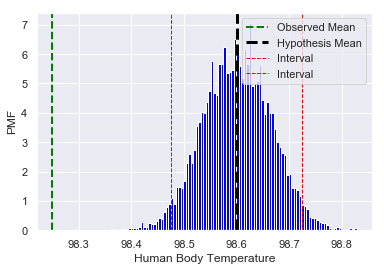

In [10]:
# Create a line for the center of the distribution around the average of the bootstrap replicates
rep_mean = np.mean(bs_replicates)

# Plot the bootstrap replicates as a PMF histogram
_ = plt.hist(bs_replicates, bins=bins, density=True, color='blue')

# Create vertical lines for all the generated data that we collected
obs_mu_line = plt.axvline(obs_mu, color='green', linestyle='dashed', linewidth=2, label='Observed Mean')
rep_mean_line = plt.axvline(rep_mean, color='black', linestyle='dashed', linewidth=3, label='Hypothesis Mean')
interval_low = plt.axvline(confidence_interval[0], color='red', linestyle='dashed', linewidth=1, label='Interval')
interval_high = plt.axvline(confidence_interval[1], color='red', linestyle='dashed', linewidth=1, label='Interval')
_ = plt.xlabel('Human Body Temperature')
_ = plt.ylabel('PMF')
_ = plt.legend(handles=[obs_mu_line, rep_mean_line, interval_low, interval_high], loc='upper right')
plt.show()

Creating a PMF for our bootstrap hypothesis test shows a similar distribution to our Bayesian hypothesis test. With the data centered around Wunderlich's claimed body temperature, our observed average body temperature is far away from his original statement.

#### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

##### a. Bayesian Approach to the Null Hypothesis Test with Sample Size n = 10

For the next exercise, we will reduce the sample size from human body temperature measurements from the entire data set to 10 random points from the data set and observe the differences. For the Bayesian approach to this Null Hypothesis test, we have to use the t-score as opposed to the z-score to measure our observation's distance from the 98.6&deg;F hypothesized mean. This is because with a sample size of 10 versus 130, the number of observations for the mean affects the normal distribution of the curve. Using a t-table, we can find thatour critical t-score $t*$ for a 95% confidence interval with 9 degrees of freedom $$df = n - 1$$ is 2.262 standard errors away from our mean.

In [11]:
np.random.seed(42)

# Center the distribution around Wunderlich's proposed average body temperature
mu_not = 98.6

# Generate a random sample from a sample size of 10
n = 10
sample = np.random.choice(df['temperature'], n)

# Find the observed average and standard deviation from the sample
obs_mu = np.mean(sample)
obs_std = np.std(sample)

# Calculate standard error and margins of error
std_err = obs_std / np.sqrt(n)
margin_error = 2.262 * std_err

# Calculate boundaries for the interval test
low_interval = mu_not - margin_error
high_interval = mu_not + margin_error

# Calculate the t-value for our observed mean given Wunderlich's proposal was true
t_value = (obs_mu - mu_not) / std_err

# Print Results
print(f'95% Confidence Interval: {low_interval:.2f} to {high_interval:.2f} Degrees F')
print(f'Observed Average Body Temperature from Sample: {obs_mu:.2f} Degrees F')
print(f'Observed T-Score is {t_value:.2f}')

95% Confidence Interval: 98.22 to 98.98 Degrees F
Observed Average Body Temperature from Sample: 98.05 Degrees F
Observed T-Score is -3.26


With the above stated $t* = 2.262$ value, our confidence interval centered around Wunderlich's 98.6&deg;F extends from 98.22&deg;F to 98.98&deg;F. This new confidence interval does not include our sampled mean body temperature of 98.05&deg;F. The t-score for 98.05&deg;F is -3.26 standard errors away from the mean which is outside the 2.262 standard error limits. From this test, we are 95% confident that the true average human body temperature lies between 98.22&deg;F and 98.98&deg;F which does not include our 98.05&deg;F observed average body temperature. We will reject the null hypothesis in favor of the alternative that the average human body temperature is not 98.6&deg;F.

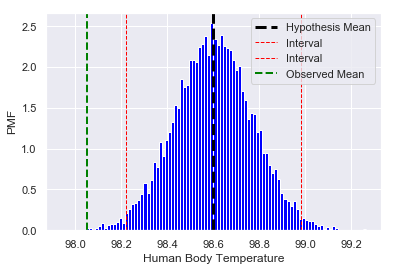

In [12]:
np.random.seed(42)

# Create 10,000 normally distributed  samples centered around the proposed mean and spread given our standard error
bins = 100
samples = np.random.normal(mu_not, std_err, 10000)

# Plot the generated points as a histogram with markers indicating confidence interval, mean, and observation
_ = plt.hist(samples, bins=bins, density=True, color='blue')
_ = plt.axvline(mu_not, color='black', linestyle='dashed', linewidth=3)
_ = plt.axvline(low_interval, color='red', linestyle='dashed', linewidth=1)
_ = plt.axvline(high_interval, color='red', linestyle='dashed', linewidth=1)
_ = plt.axvline(obs_mu, color='green', linestyle='dashed', linewidth=2)
_ = plt.xlabel('Human Body Temperature')
_ = plt.ylabel('PMF')
_ = plt.legend(('Hypothesis Mean', 'Interval', 'Interval', 'Observed Mean'), loc='upper right')
plt.show()


Again, from this small sampling of our original data, we reject Wunderlich's claim that the average human body temperature is 98.6&deg;F

##### b. The Frequentist Approach to Sampling from a Sample Size of n=10

The bootstrapping method for our test starts with generating a random sample of 10 data points from our original observations. Like the bootstrapping method from the previous example, we have to translate all the data points so that the sample mean is centered around 98.6&deg;F. After that, we generate 10,000 bootstrap replicates by sampling our 10 data points with replacement 10,000 times. We then find the percentiles where 2.5% and 97.5% of the generated bootstrap replicates lie which will tell us the boundaries for our confidence interval.

In [13]:
np.random.seed(42)

# Generate a random sample from a sample size of 10
n = 10
sample = np.random.choice(df['temperature'], n)

# Transform our data so that it's mean is 98.6F
obs_mu = np.mean(sample)
translated_temp = sample - obs_mu + 98.6

# Prepare a bootstrap replicate array that will accept 10000 bootstrap replicates
size = 10000
bs_replicates = np.empty(size)

# Generate bootstrap samples with bootstrap replicate means that are all stored in the bootstrap replicates array
for i in range(size):
    bs_sample = np.random.choice(translated_temp, len(sample))
    bs_replicate = np.mean(bs_sample)
    bs_replicates[i] = bs_replicate

# Generate a confidence interval and p-value using the bootstrap replicates we generated
confidence_interval = np.percentile(bs_replicates, [2.5, 97.5])
p_value = np.sum(bs_replicates < obs_mu) / size

print(f'95% Confidence Interval: {confidence_interval[0]:.2f} to {confidence_interval[1]:.2f} Degrees F')
print(f'Observed Average Body Temperature from Sample: {obs_mu:.2f} Degrees F')
print(f'Observed P-Value is {p_value}')

95% Confidence Interval: 98.28 to 98.93 Degrees F
Observed Average Body Temperature from Sample: 98.05 Degrees F
Observed P-Value is 0.0006


Our confidence interval using the bootstrapping method is between 98.28&deg;F and 98.93&deg;F. Comparing that to our Bayesian approach's confidence interval of 98.22&deg;F and 98.98&deg;F and you get nearly the same results either way. The p-value that our 98.05&deg;F mean observation yields is 0.0006. This means that 0.0006 of the 10,000 bootstrap replicates lie below the observed body temperature. With the bootstrapping method, we are 95% confident that the true average body temperature lies between 98.22&deg;F and 98.98&deg;F. Because our observed body temperature lies outside this interval, we will reject the null hypothesis that the true average body temperature is 98.6&deg;F in favor for the alternative that the average body temperature is not 98.6&deg;F

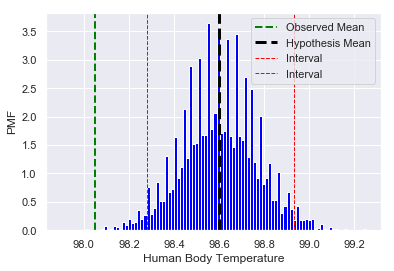

In [14]:
rep_mean = np.mean(bs_replicates)

# Plot the bootstrap replicates as a PMF histogram
_ = plt.hist(bs_replicates, bins=bins, density=True, color='blue')

# Create vertical lines for all the generated data that we collected
obs_mu_line = plt.axvline(obs_mu, color='green', linestyle='dashed', linewidth=2, label='Observed Mean')
rep_mean_line = plt.axvline(rep_mean, color='black', linestyle='dashed', linewidth=3, label='Hypothesis Mean')
interval_low = plt.axvline(confidence_interval[0], color='red', linestyle='dashed', linewidth=1, label='Interval')
interval_high = plt.axvline(confidence_interval[1], color='red', linestyle='dashed', linewidth=1, label='Interval')
_ = plt.xlabel('Human Body Temperature')
_ = plt.ylabel('PMF')
_ = plt.legend(handles=[obs_mu_line, rep_mean_line, interval_low, interval_high], loc='upper right')
plt.show()

Here is the PMF for this bootstrapping test which posts similar distributions to the Bayesian PMF. One question to ask is which test (the Bayesian approach or bootstrapping) is appropriate for this example. The answer is either works, but both need to be set up properly. For the Bayesian approach you need to make sure that you are sampling 10 random points from the data set and using the appropriate critical t-score $t*$ to create the correct boundaries for the confidence interval. For the bootstrapping approach, you need to make sure that you translate the mean properly and generate bootstrap replicates from randomly generated bootstrap samples. Either approach yields approximately the same results, so setting up the tests correctly should be the main priority. And as with all confidence interval tests, the more samples that you sample from, the more accurate your test gets to measuring the true proportion metric.

#### 5. At what temperature should we consider someone's temperature to be "abnormal"?

##### a. The Bayesian Approach to Defining Abnormality

Now that we've established that our true proportion mean is not 98.6&deg;F, we will now identify when someone's temperature is considered "abnormal". Our definition of abnormality for this example will run on a 95% confidence interval of a truly normally distributed sample. This is because we are now assuming that this distribution will encompass all individuals on planet Earth where their individual body temperatures are approximately normally distributed. The standard error for this distribution will then be equal to the standard deviation of our entire data set.

In [15]:
mu_not = np.mean(df['temperature'])
std_dev = np.std(df['temperature'])
print(f'Hypothesized Average Body Temperature: {mu_not:.2f} Degrees F')
print(f'Hypothesized Standard Error: {std_dev:.2f} Degrees F')

Hypothesized Average Body Temperature: 98.25 Degrees F
Hypothesized Standard Error: 0.73 Degrees F


The average body temperature for this example is the average body temperature of our data set which is 98.25&deg;F. The standard deviation from the mean is 0.73&deg;F.

In [16]:
# Calculate standard and margins of error
margin_error = 1.96 * std_dev

# Calculate boundaries for the interval test
low_interval = mu_not - margin_error
high_interval = mu_not + margin_error

# Display the boundaries for the interval test
print(f'95% Confidence Interval: {low_interval:.2f} to {high_interval:.2f} Degrees F')

95% Confidence Interval: 96.82 to 99.68 Degrees F


Because we are using the z-score to define our confidence interval boundaries, our margin of error for a 95% confidence interval is $\pm$ 1.96 standard errors away from the mean. Assuming that our 98.25&deg;F average body temperature is true, we are 95% confident that the true human body temperature should be between 96.82&deg;F and 99.68&deg;F. With our stated definition of "abnormal" body temperature, we will assume that a person's body temperature outside this interval is not normal.

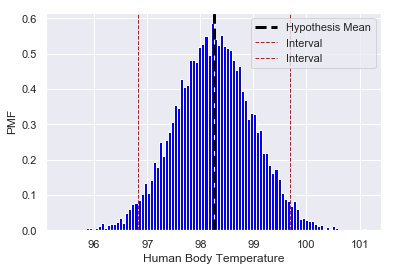

In [17]:
np.random.seed(42)

# Create 10,000 normally distributed  samples centered around the proposed mean and spread given our standard error
bins = 100
samples = np.random.normal(mu_not, std_dev, 10000)

# Plot the generated points as a histogram with markers indicating confidence interval, mean, and observation
_ = plt.hist(samples, bins=bins, density=True, color='blue')
_ = plt.axvline(mu_not, color='black', linestyle='dashed', linewidth=3)
_ = plt.axvline(low_interval, color='red', linestyle='dashed', linewidth=1)
_ = plt.axvline(high_interval, color='red', linestyle='dashed', linewidth=1)
_ = plt.xlabel('Human Body Temperature')
_ = plt.ylabel('PMF')
_ = plt.legend(('Hypothesis Mean', 'Interval', 'Interval'), loc='upper right')
plt.show()

With our defined 98.25&deg;F average body temperature, this is the approximate spread of 10,000 individual's body temperatures. Any individuals with body temperatures outside the region marked with the red dotted lines are considered to have "abnormal" body temperatures.

##### b. The Frequentist Approach to Defining Abnormality

As with all Bayesian approaches to defining a confidence interval, the same can be accomplished with the frequentist approach of bootstrapping. The caveat to bootstrapping for this example, however, is that we can only pull from the data points we sampled. By nature, this approach to bootstrapping will be discrete since our bootstrap samples are going to be of size 1. The confidence interval should be similar to the Bayesian approach, but the discrete limitations to bootstrapping here is not ideal.

In [18]:
np.random.seed(42)

# Transform our data so that it's mean is 98.6F
obs_mu = np.mean(df['temperature'])

# Prepare a bootstrap replicate array that will accept 10000 bootstrap replicates
size = 10000
bs_replicates = np.empty(size)

# Generate bootstrap samples with bootstrap replicate means that are all stored in the bootstrap replicates array
for i in range(size):
    bs_sample = np.random.choice(df['temperature'], 1)
    bs_replicate = np.mean(bs_sample)
    bs_replicates[i] = bs_replicate

# Generate a confidence interval and p-value using the bootstrap replicates we generated
confidence_interval = np.percentile(bs_replicates, [2.5, 97.5])

# Print Results
print(f'95% Confidence Interval: {confidence_interval[0]:.2f} to {confidence_interval[1]:.2f} Degrees F')

95% Confidence Interval: 96.70 to 99.50 Degrees F


Comparing the confidence interval to the confidence interval we received from the Bayesian approach, we see a range from 96.7&deg;F to 99.5&deg;F versus 96.8&deg;F and 99.7&deg;F. As expected, the two approaches yield nearly similar results, but since the sample mean should be a continous metric, the Bayesian approach is a more reliable approach for determining the 95% confidence interval over the frequentist approach.

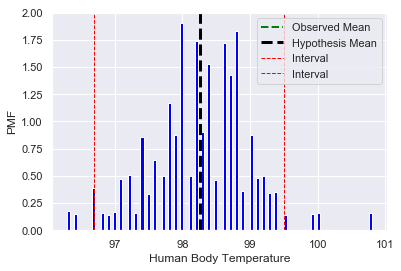

In [19]:
rep_mean = np.mean(bs_replicates)

# Plot the bootstrap replicates as a PMF histogram
_ = plt.hist(bs_replicates, bins=bins, density=True, color='blue')

# Create vertical lines for all the generated data that we collected
rep_mean_line = plt.axvline(rep_mean, color='black', linestyle='dashed', linewidth=3, label='Hypothesis Mean')
interval_low = plt.axvline(confidence_interval[0], color='red', linestyle='dashed', linewidth=1, label='Interval')
interval_high = plt.axvline(confidence_interval[1], color='red', linestyle='dashed', linewidth=1, label='Interval')
_ = plt.xlabel('Human Body Temperature')
_ = plt.ylabel('PMF')
_ = plt.legend(handles=[obs_mu_line, rep_mean_line, interval_low, interval_high], loc='upper right')
plt.show()

The PMF for the frequentist approach further highlights the limitations for bootstrapping here. There are only 130 discrete values for which the body temperature can take given our limited data set. In fact, with a different seed, some of the 130 values might not even be chosen and skew the distribution outside the expected confidence interval.

#### 6. Is there a significant difference between males and females in normal temperature?

To determine whether or not men and women have differences in body temperatures, we first have to split the genders into two groups, find the average body temperature of men and women separately, then take the difference in average temperatures between the two genders which will also have a new standard error. After that, we will  test our Null Hypothesis that there is no difference between male and female body temperatures. Our alternative hypothesis is that there is a difference between the two genders. We will reject our Null Hypothesis if our observed difference is outside the 95% confidence interval centered around the zero difference. Putting all this information succinctly:

$\overline {x} = \overline {x(male)}$ - $\overline {x(female)}$

$\sigma = \sqrt {\sigma(male)^{2} + \sigma(female)^{2}}$

$\sigma(male) = {\dfrac{Std.Dev.(male)}{\sqrt{n(male)}}}$

$\sigma(female) = {\dfrac{Std.Dev.(female)}{\sqrt{n(female)}}}$

H<sub>0</sub>: $\mu$ = 0

H<sub>a</sub>: $\mu \neq$ 0

$\alpha = 0.05$

In [20]:
# Create a separate DataFrame only containing male temperature information
male = df.loc[df.gender == 'M',['gender', 'temperature']]
male.head()

,gender,temperature
2,M,97.8
5,M,99.2
6,M,98.0
7,M,98.8
12,M,98.2


In [21]:
# Create a separate DataFrame only containing female temperature information
female = df.loc[df.gender == 'F',['gender', 'temperature']]
female.head()

,gender,temperature
0,F,99.3
1,F,98.4
3,F,99.2
4,F,98.0
8,F,98.4


In [22]:
# Find individual male statistics
male_temp_mean = np.mean(male['temperature'])
male_temp_std = np.std(male['temperature'])
male_std_err = male_temp_std / np.sqrt(len(male))

# Find individual female statistics
female_temp_mean = np.mean(female['temperature'])
female_temp_std = np.std(female['temperature'])
female_std_err = female_temp_std / np.sqrt(len(female))

# Find joint male and female distributions
mean_diff = male_temp_mean - female_temp_mean
mean_std_err = np.sqrt(male_std_err**2 + female_std_err**2)

# Print results
print(f'Observed Average Difference Between Male and Female Body Temperatures: {mean_diff:.2f} Degrees F')
print(f'Observed Average Standard Error: {mean_std_err:.2f} Degrees F')
mean_diff, mean_std_err

Observed Average Difference Between Male and Female Body Temperatures: -0.29 Degrees F
Observed Average Standard Error: 0.13 Degrees F


(-0.289230769230727, 0.12557668521231213)

We find that the mean difference between males and females in our observed data set is -0.28&deg;F with a joint standard error of 0.13&deg;F. Is this difference statistically significant? To determine this, we will generate our confidence interval centered around zero difference and see if our observation lands outside this interval.

In [23]:
# Centering our average around zero mean
mu_not = 0

# Calculate standard and margins of error
margin_error = 1.96 * mean_std_err

# Calculate boundaries for the interval test
low_interval = mu_not - margin_error
high_interval = mu_not + margin_error

# Display the boundaries for the interval test
print(f'95% Confidence Interval: {low_interval:.2f} to {high_interval:.2f} Degrees F')

95% Confidence Interval: -0.25 to 0.25 Degrees F


With 95% confidence, the true difference between men and women lies around -0.25&deg;F and 0.25&deg;F. We observed that the average difference between male and female body temperatures we -0.28&deg;F which lies outside this confidence interval. To determine how far off our observation is from the zero-difference hypothesis, we find the observation's z-score.

In [24]:
# Calculate the z-value for zero difference between men and women
z_value = (mean_diff - mu_not) / mean_std_err
print(f'Observed Z-Score is {z_value:.2f}')

Observed Z-Score is -2.30


Our observation is -2.30 standard errors away from the zero-difference mean. With a 95% confidence interval, our observation should be between -1.96 and 1.96 standard errors away from the hypothesized zero-difference for us to fail to reject our null hypothesis. Because our observed difference of -0.25&deg;F between male and female body temperatures lies outside this defined confidence interval, we are going to reject the Null Hypothesis that there is no difference between the two gender's body temperatures in favor for the alternative that there is a difference between their body temperatures.

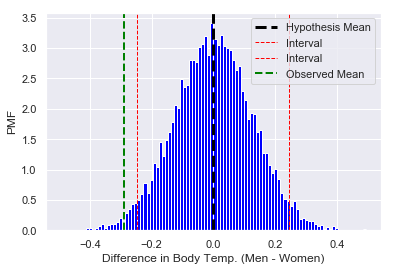

In [25]:
np.random.seed(42)

# Create 10,000 normally distributed  samples centered around the proposed mean and spread given our standard error
bins = 100
samples = np.random.normal(mu_not, mean_std_err, 10000)

# Plot the generated points as a histogram with markers indicating confidence interval, mean, and observation
_ = plt.hist(samples, bins=bins, density=True, color='blue')
_ = plt.axvline(mu_not, color='black', linestyle='dashed', linewidth=3)
_ = plt.axvline(low_interval, color='red', linestyle='dashed', linewidth=1)
_ = plt.axvline(high_interval, color='red', linestyle='dashed', linewidth=1)
_ = plt.axvline(mean_diff, color='green', linestyle='dashed', linewidth=2)
_ = plt.xlabel('Difference in Body Temp. (Men - Women)')
_ = plt.ylabel('PMF')
_ = plt.legend(('Hypothesis Mean', 'Interval', 'Interval', 'Observed Mean'), loc='upper right')
plt.show()

Illustrating our observations through a PMF shows that the observed difference in green is outside the confidence interval marked in red. Because we are 95% confident that the true difference lies between the two markers in red, we favor the alternative hypothesis that there is a difference between male and female body temperatures.